In [2]:
zoning_df = read.csv('../data/zoning.csv')
listing_df = read.csv('../data/listing.csv')
sale_df = read.csv('../data/sale.csv')

In [3]:
head(zoning_df)

Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle
1,60,RL,65,8450,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story
2,20,RL,80,9600,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story
3,60,RL,68,11250,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story
4,70,RL,60,9550,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story
5,60,RL,84,14260,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story
6,50,RL,85,14115,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin


In [4]:
head(listing_df)

Id,Street,Alley,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,⋯,WoodDeckSF,OpenPorchSF,EnclosedPorch,ThreeSsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal
1,Pave,,7,5,2003,2003,Gable,CompShg,VinylSd,⋯,0,61,0,0,0,0,,,,0
2,Pave,,6,8,1976,1976,Gable,CompShg,MetalSd,⋯,298,0,0,0,0,0,,,,0
3,Pave,,7,5,2001,2002,Gable,CompShg,VinylSd,⋯,0,42,0,0,0,0,,,,0
4,Pave,,7,5,1915,1970,Gable,CompShg,Wd Sdng,⋯,0,35,272,0,0,0,,,,0
5,Pave,,8,5,2000,2000,Gable,CompShg,VinylSd,⋯,192,84,0,0,0,0,,,,0
6,Pave,,5,5,1993,1995,Gable,CompShg,VinylSd,⋯,40,30,0,320,0,0,,MnPrv,Shed,700


In [5]:
head(sale_df)

Id,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1,2,2008,WD,Normal,208500
2,5,2007,WD,Normal,181500
3,9,2008,WD,Normal,223500
4,2,2006,WD,Abnorml,140000
5,12,2008,WD,Normal,250000
6,10,2009,WD,Normal,143000


In [6]:
source('../src/load_data.r')
source('../src/load_data-02.r')
source('../src/multiplot.r')

In [7]:
dim(housing_df)

[1] 1451   80

In [8]:
summary(sale_df$SalePrice)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  34900  130000  163000  180900  214000  755000 

In [9]:
salep <- split(sale_df, cut(sale_df$SalePrice, c(0,180000, 350000, 600000, 80000), include.lowest=TRUE))

In [10]:
table(salep[[1]]$SaleType)


  COD   Con ConLD ConLI ConLw   CWD   New   Oth    WD 
    2     0     1     0     1     0     0     0    35 

In [18]:
t(table(salep[[1]]$SaleType))

      
       COD Con ConLD ConLI ConLw CWD New Oth WD
  [1,]   2   0     1     0     1   0   0   0 35

In [17]:
a <- t(t(table(salep[[1]]$SaleType)))
b <- t(t(table(salep[[2]]$SaleType)))
c <- t(t(table(salep[[3]]$SaleType)))
d <- t(t(table(salep[[4]]$SaleType)))
sales <- cbind(a, b, c, d)

In [17]:
#prop.table(sales)
Housetypes <- c("(0-180000)", "[180000-350000)", "[350000-600000)", "[600000-800000)")
salestype <- rbind(Housetypes, prop.table(sales))
salestype

Housetypes,(0-180000),[180000-350000),[350000-600000),[600000-800000)
COD,0.00137362637362637,0.0226648351648352,0.00549450549450549,0
Con,0,0,0.00137362637362637,0
ConLD,0.000686813186813187,0.00412087912087912,0.00137362637362637,0
ConLI,0,0.00206043956043956,0.000686813186813187,0.000686813186813187
ConLw,0.000686813186813187,0.00137362637362637,0.00137362637362637,0
CWD,0,0.00137362637362637,0.00137362637362637,0
New,0,0.0157967032967033,0.0480769230769231,0.0192307692307692
Oth,0,0.00206043956043956,0,0
WD,0.0240384615384615,0.539148351648352,0.290521978021978,0.0144230769230769


For the contengincy table, it can be seen that for the highest level of selling the type of new take the most part, and for the lowest selling price level, the WD was the majority

In [53]:
t(prop.table(table(sale_df$SaleType, sale_df$SaleCondition)))

         
                   COD          Con        ConLD        ConLI        ConLw
  Abnorml 0.0164383562 0.0000000000 0.0013698630 0.0006849315 0.0000000000
  AdjLand 0.0000000000 0.0000000000 0.0000000000 0.0000000000 0.0000000000
  Alloca  0.0000000000 0.0000000000 0.0000000000 0.0000000000 0.0000000000
  Family  0.0000000000 0.0000000000 0.0000000000 0.0000000000 0.0000000000
  Normal  0.0130136986 0.0013698630 0.0041095890 0.0027397260 0.0034246575
  Partial 0.0000000000 0.0000000000 0.0006849315 0.0000000000 0.0000000000
         
                   CWD          New          Oth           WD
  Abnorml 0.0006849315 0.0000000000 0.0020547945 0.0479452055
  AdjLand 0.0000000000 0.0000000000 0.0000000000 0.0027397260
  Alloca  0.0000000000 0.0000000000 0.0000000000 0.0082191781
  Family  0.0006849315 0.0000000000 0.0000000000 0.0130136986
  Normal  0.0013698630 0.0000000000 0.0000000000 0.7945205479
  Partial 0.0000000000 0.0835616438 0.0000000000 0.0013698630

For the relationship between SaleType and SaleCondition, for the normal condition house, the WD was the majority type(79%)

In [54]:
count_empty_total()

**A pair plot for multiple numerical features**

In [55]:
str(Filter(is.numeric, housing_df))

'data.frame':	1451 obs. of  24 variables:
 $ LotFrontage  : num  65 80 68 60 84 ...
 $ LotArea      : int  8450 9600 11250 9550 14260 14115 10084 10382 6120 7420 ...
 $ YearBuilt    : int  2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 ...
 $ YearRemodAdd : int  2003 1976 2002 1970 2000 1995 2005 1973 1950 1950 ...
 $ MasVnrArea   : num  196 0 162 0 350 0 186 240 0 0 ...
 $ BsmtFinSF1   : int  706 978 486 216 655 732 1369 859 0 851 ...
 $ BsmtFinSF2   : int  0 0 0 0 0 0 0 32 0 0 ...
 $ BsmtUnfSF    : int  150 284 434 540 490 64 317 216 952 140 ...
 $ TotalBsmtSF  : int  856 1262 920 756 1145 796 1686 1107 952 991 ...
 $ FirstFlrSF   : int  856 1262 920 961 1145 796 1694 1107 1022 1077 ...
 $ SecondFlrSF  : int  854 0 866 756 1053 566 0 983 752 0 ...
 $ LowQualFinSF : int  0 0 0 0 0 0 0 0 0 0 ...
 $ GrLivArea    : int  1710 1262 1786 1717 2198 1362 1694 2090 1774 1077 ...
 $ GarageYrBlt  : num  2003 1976 2001 1998 2000 ...
 $ GarageArea   : int  548 460 608 642 836 480 636 484 468 20

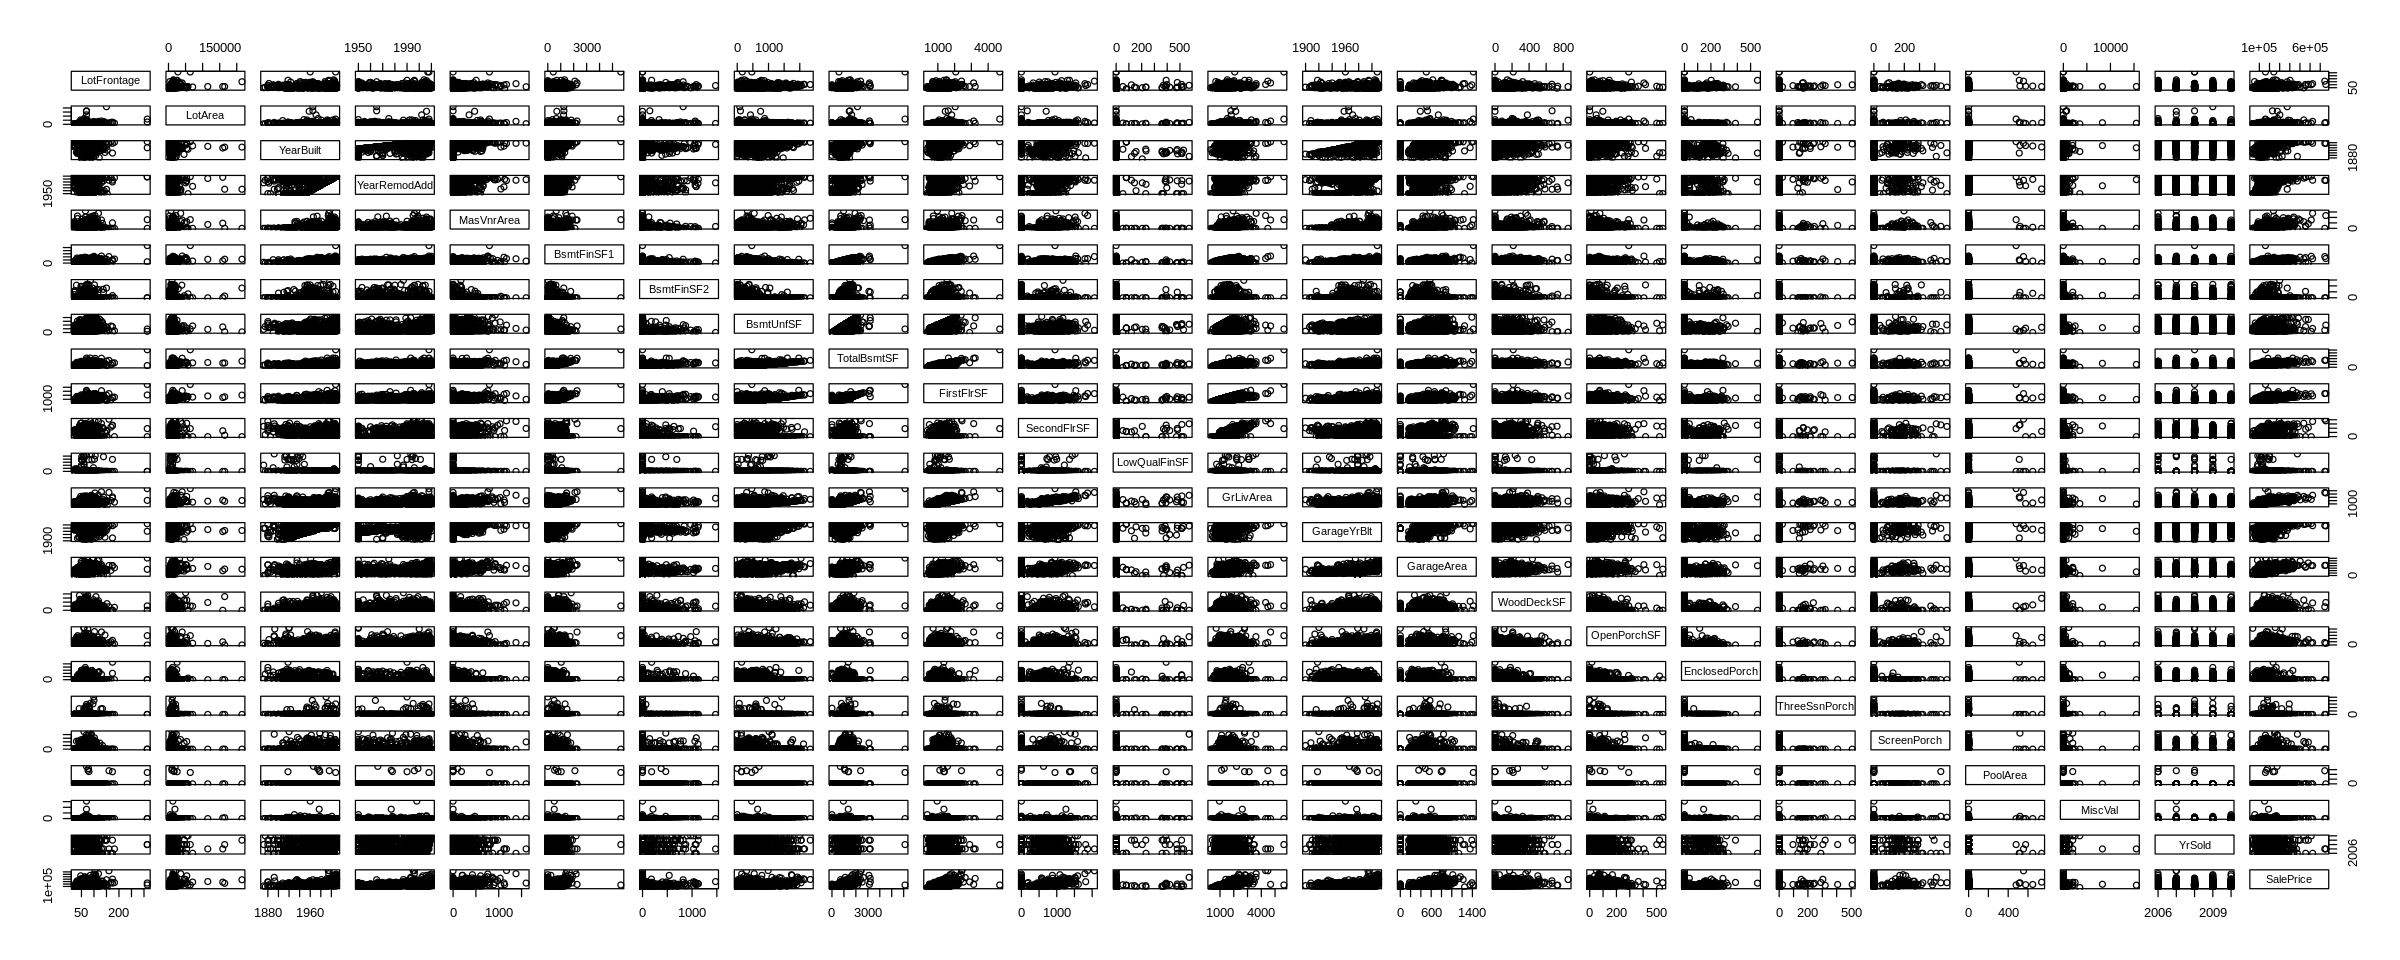

In [56]:
pairs(Filter(is.numeric, housing_df))

In [57]:
colnames(Filter(is.numeric, housing_df))

[1] "LotFrontage"   "LotArea"       "YearBuilt"     "YearRemodAdd" 
 [5] "MasVnrArea"    "BsmtFinSF1"    "BsmtFinSF2"    "BsmtUnfSF"    
 [9] "TotalBsmtSF"   "FirstFlrSF"    "SecondFlrSF"   "LowQualFinSF" 
[13] "GrLivArea"     "GarageYrBlt"   "GarageArea"    "WoodDeckSF"   
[17] "OpenPorchSF"   "EnclosedPorch" "ThreeSsnPorch" "ScreenPorch"  
[21] "PoolArea"      "MiscVal"       "YrSold"        "SalePrice"

In [58]:
attach(housing_df)

In [59]:
library(ggplot2)

**A distribution plot showing the distribution, mean, and median**

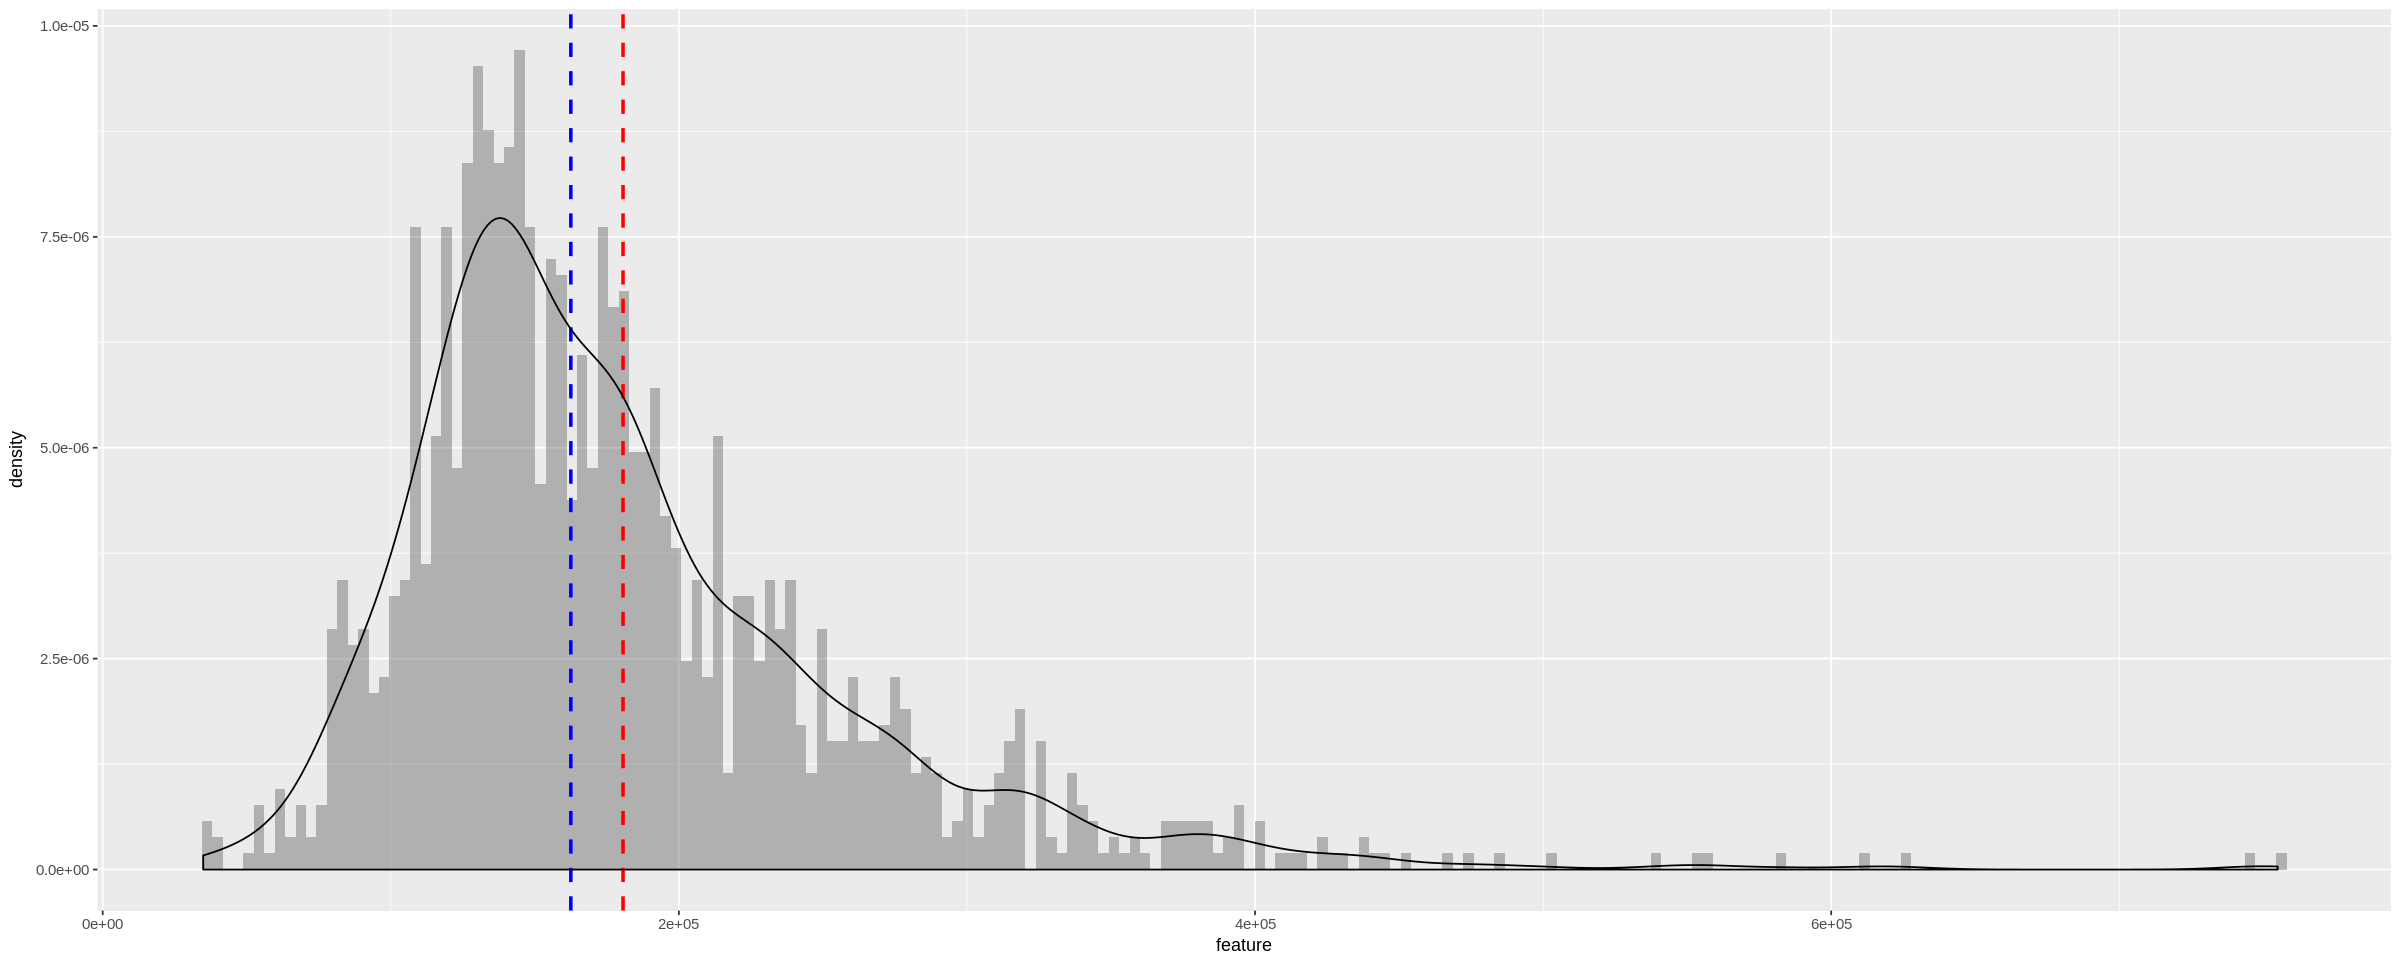

In [60]:
hist_with_kde(SalePrice)

In [61]:
colnames(Filter(is.numeric, housing_df))

[1] "LotFrontage"   "LotArea"       "YearBuilt"     "YearRemodAdd" 
 [5] "MasVnrArea"    "BsmtFinSF1"    "BsmtFinSF2"    "BsmtUnfSF"    
 [9] "TotalBsmtSF"   "FirstFlrSF"    "SecondFlrSF"   "LowQualFinSF" 
[13] "GrLivArea"     "GarageYrBlt"   "GarageArea"    "WoodDeckSF"   
[17] "OpenPorchSF"   "EnclosedPorch" "ThreeSsnPorch" "ScreenPorch"  
[21] "PoolArea"      "MiscVal"       "YrSold"        "SalePrice"

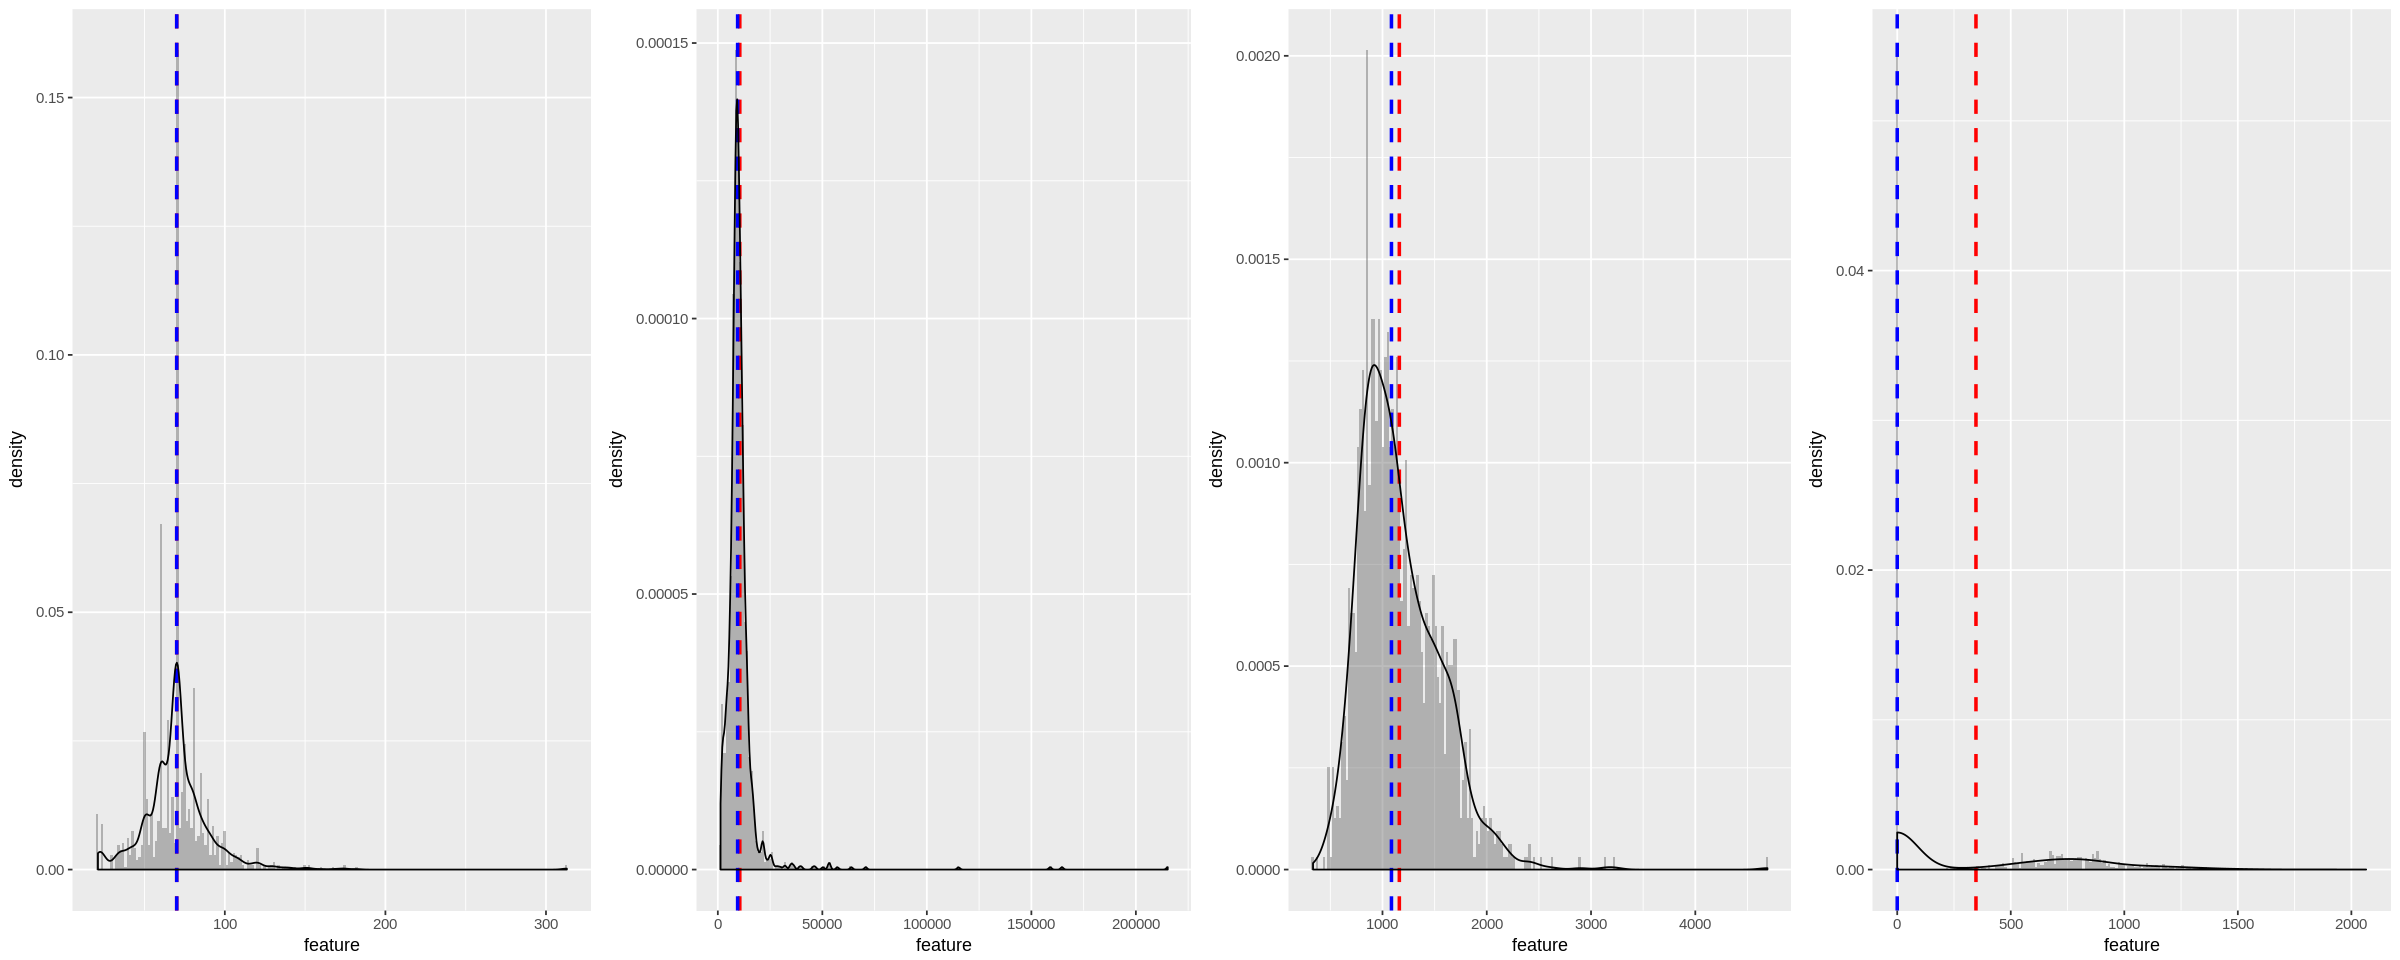

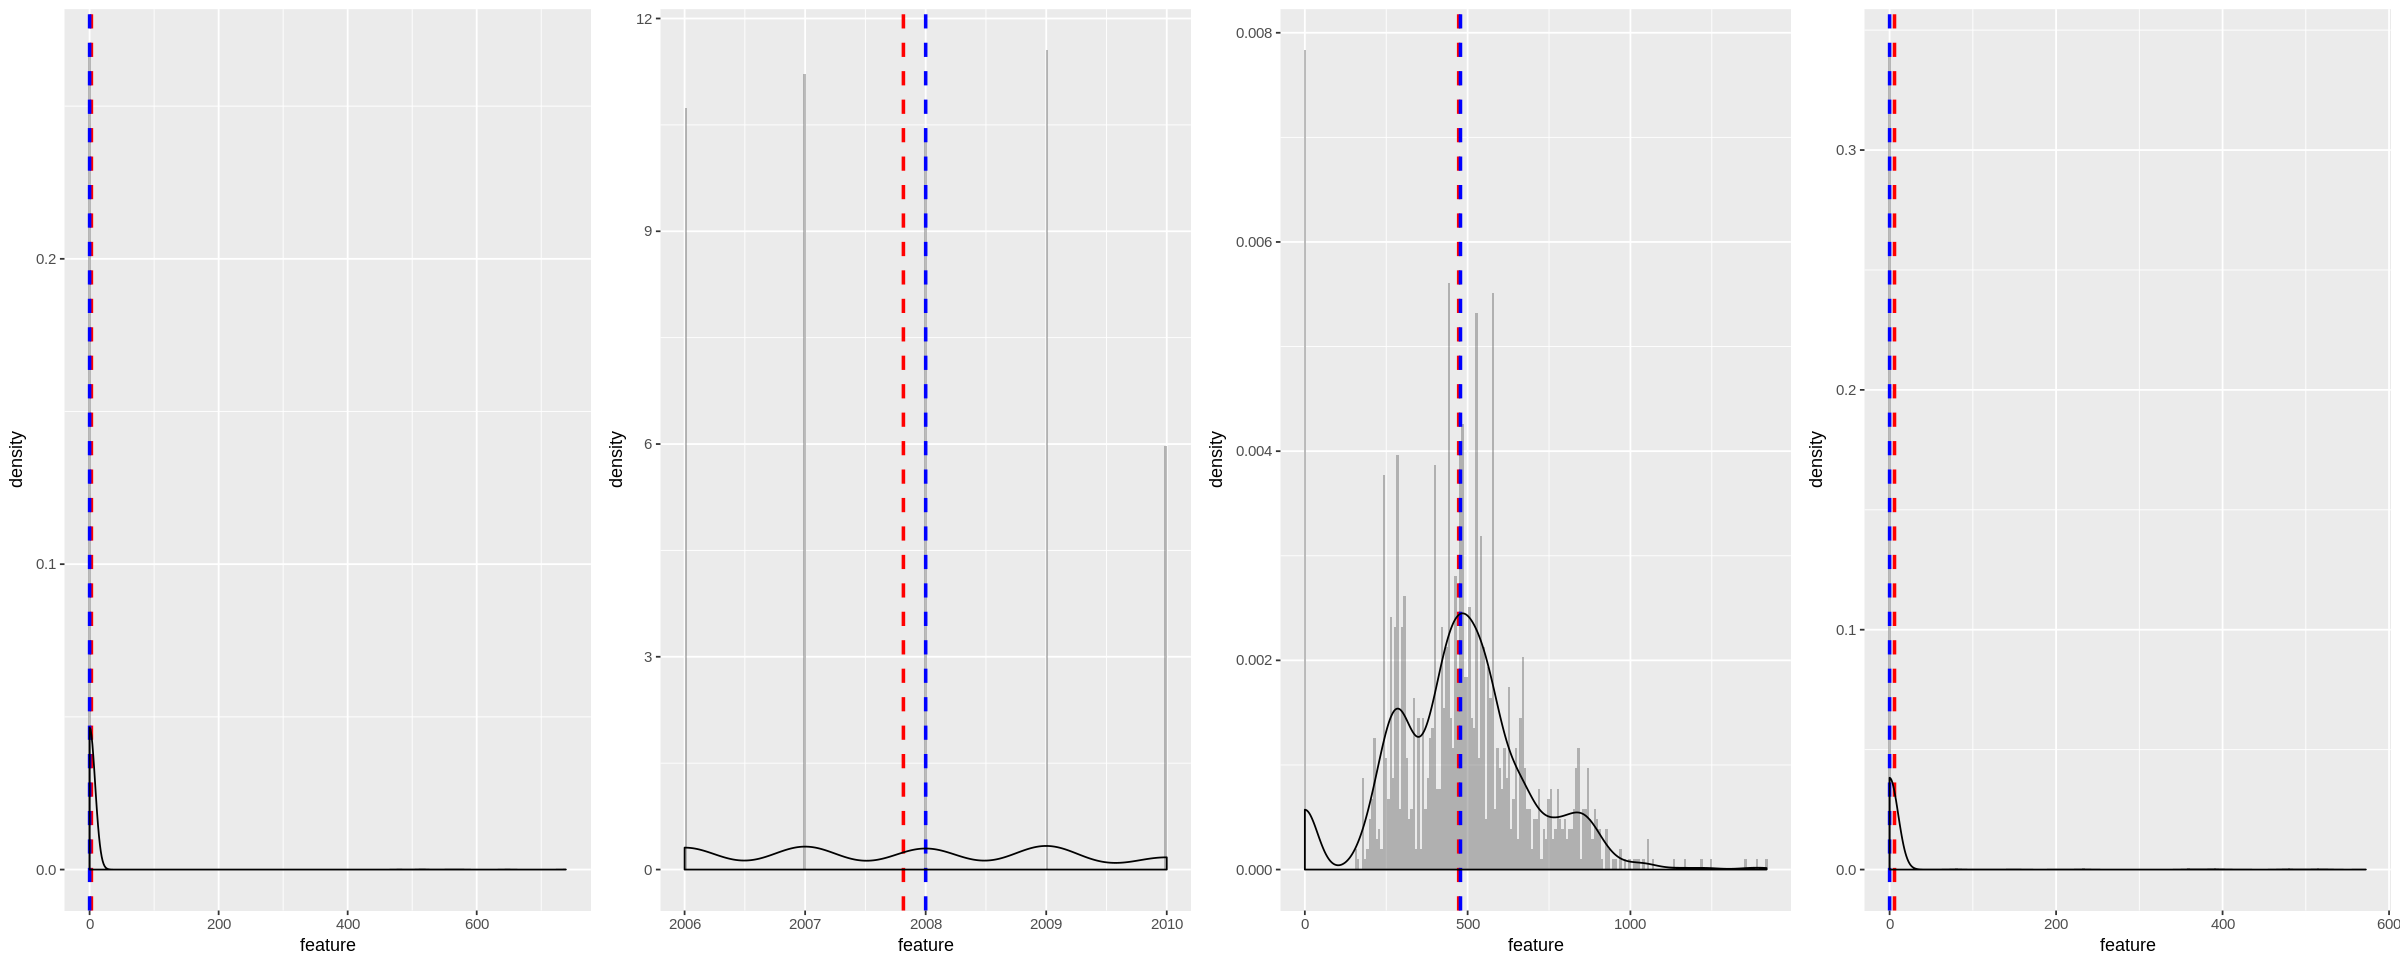

In [62]:
multiplot(hist_with_kde(LotFrontage),
          hist_with_kde(LotArea), 
          hist_with_kde(FirstFlrSF),
          hist_with_kde(SecondFlrSF),
          cols = 4)
multiplot(hist_with_kde(PoolArea),
          hist_with_kde(YrSold), 
          hist_with_kde(GarageArea),
          hist_with_kde(LowQualFinSF),
          cols = 4)

In [63]:
str(Filter(is.factor, housing_df))

'data.frame':	1451 obs. of  56 variables:
 $ MSSubClass   : Factor w/ 15 levels "20","30","40",..: 6 1 6 7 6 5 1 6 5 15 ...
 $ MSZoning     : Factor w/ 5 levels "C (all)","FV",..: 4 4 4 4 4 4 4 4 5 4 ...
 $ LotShape     : Factor w/ 4 levels "IR1","IR2","IR3",..: 4 4 1 1 1 1 4 1 4 4 ...
 $ LandContour  : Factor w/ 4 levels "Bnk","HLS","Low",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ Utilities    : Factor w/ 2 levels "AllPub","NoSeWa": 1 1 1 1 1 1 1 1 1 1 ...
 $ LotConfig    : Factor w/ 5 levels "Corner","CulDSac",..: 5 3 5 1 3 5 5 1 5 1 ...
 $ LandSlope    : Factor w/ 3 levels "Gtl","Mod","Sev": 1 1 1 1 1 1 1 1 1 1 ...
 $ Neighborhood : Factor w/ 25 levels "Blmngtn","Blueste",..: 6 25 6 7 14 12 21 17 18 4 ...
 $ Condition1   : Factor w/ 9 levels "Artery","Feedr",..: 3 2 3 3 3 3 3 5 1 1 ...
 $ Condition2   : Factor w/ 8 levels "Artery","Feedr",..: 3 3 3 3 3 3 3 3 3 1 ...
 $ BldgType     : Factor w/ 5 levels "1Fam","2fmCon",..: 1 1 1 1 1 1 1 1 1 2 ...
 $ HouseStyle   : Factor w/ 8 levels "1.5Fin","1.

**A distribution plot showing the distribution of a numerical feature broken down by a categorical feature**

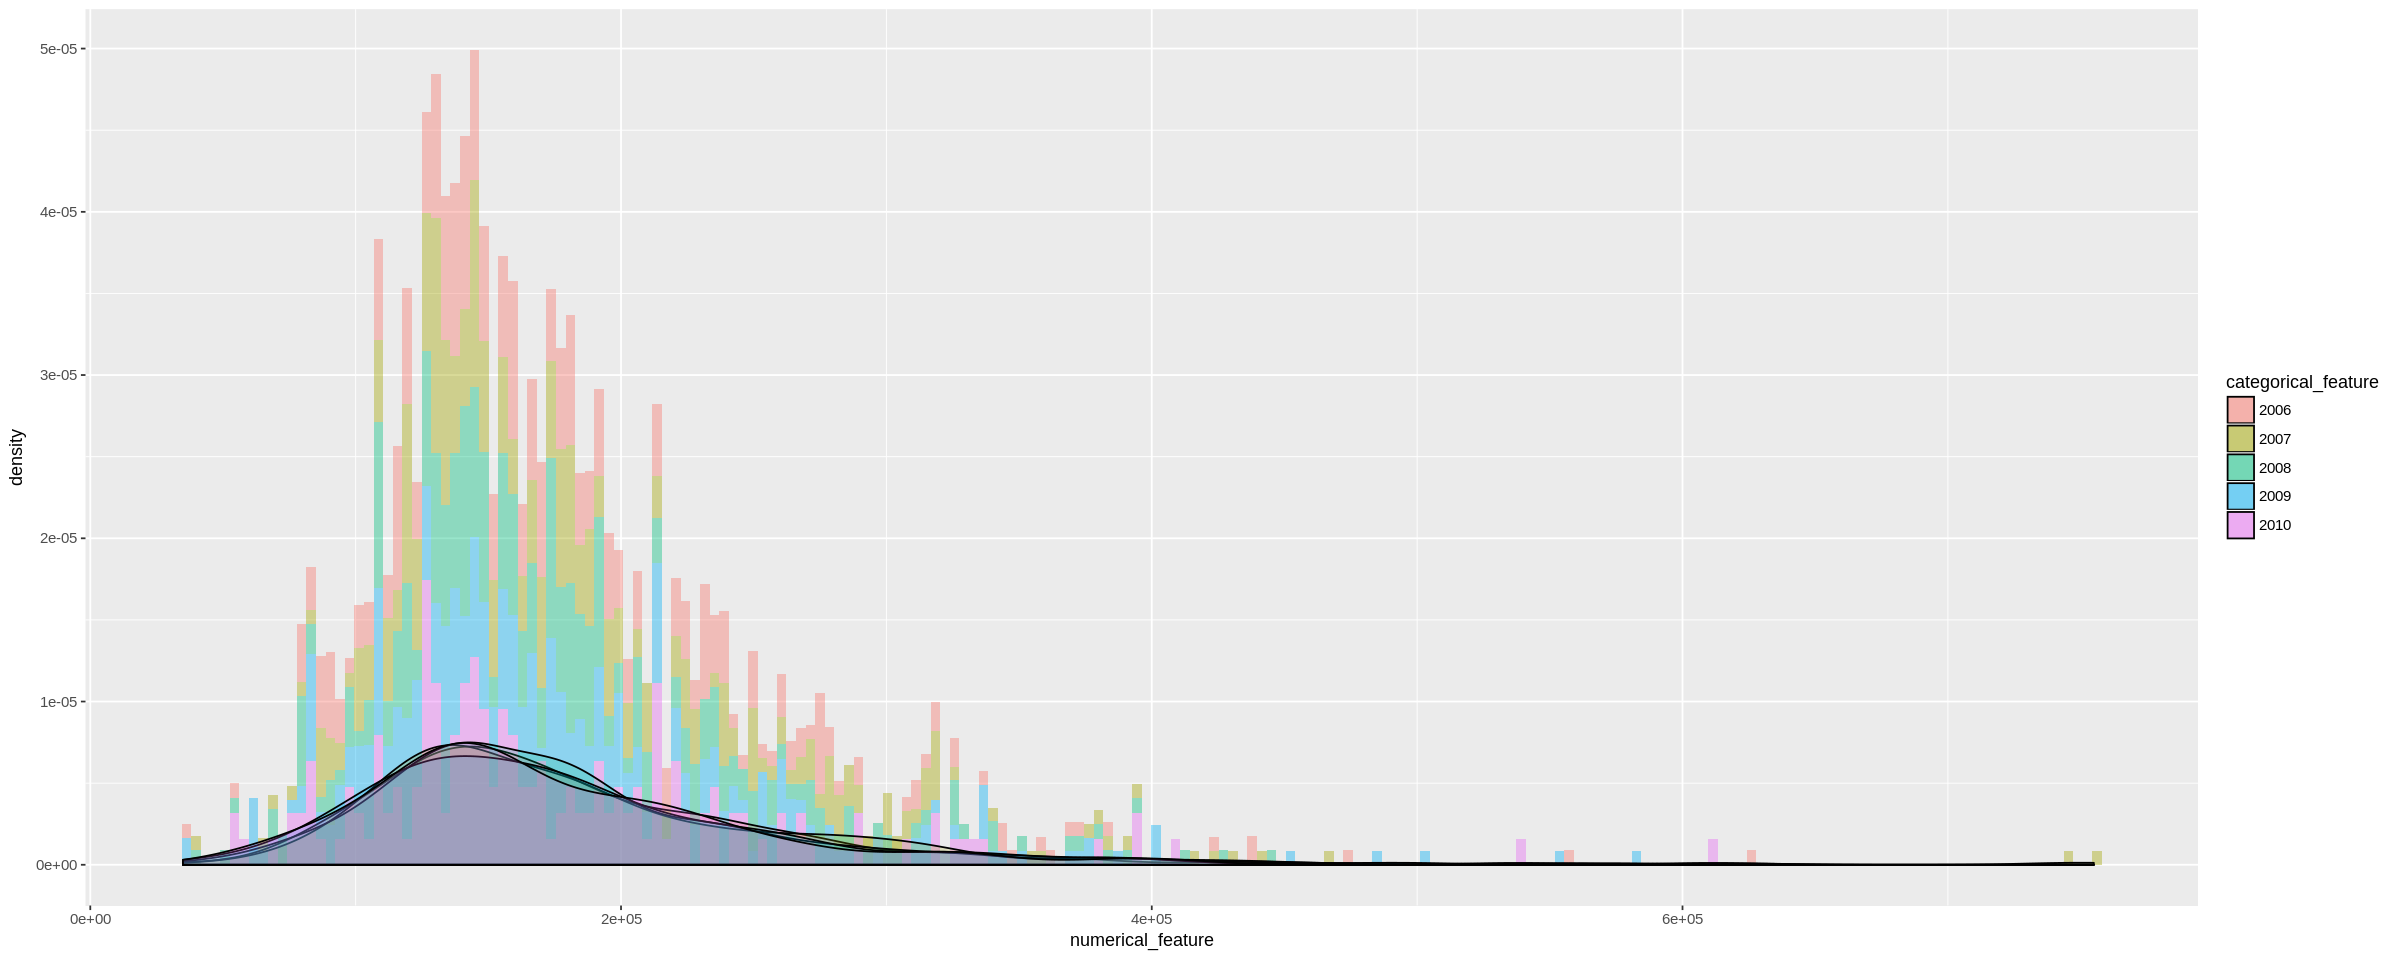

In [64]:
hist_with_kde_numerical_by_category(SalePrice, as.factor(YrSold))

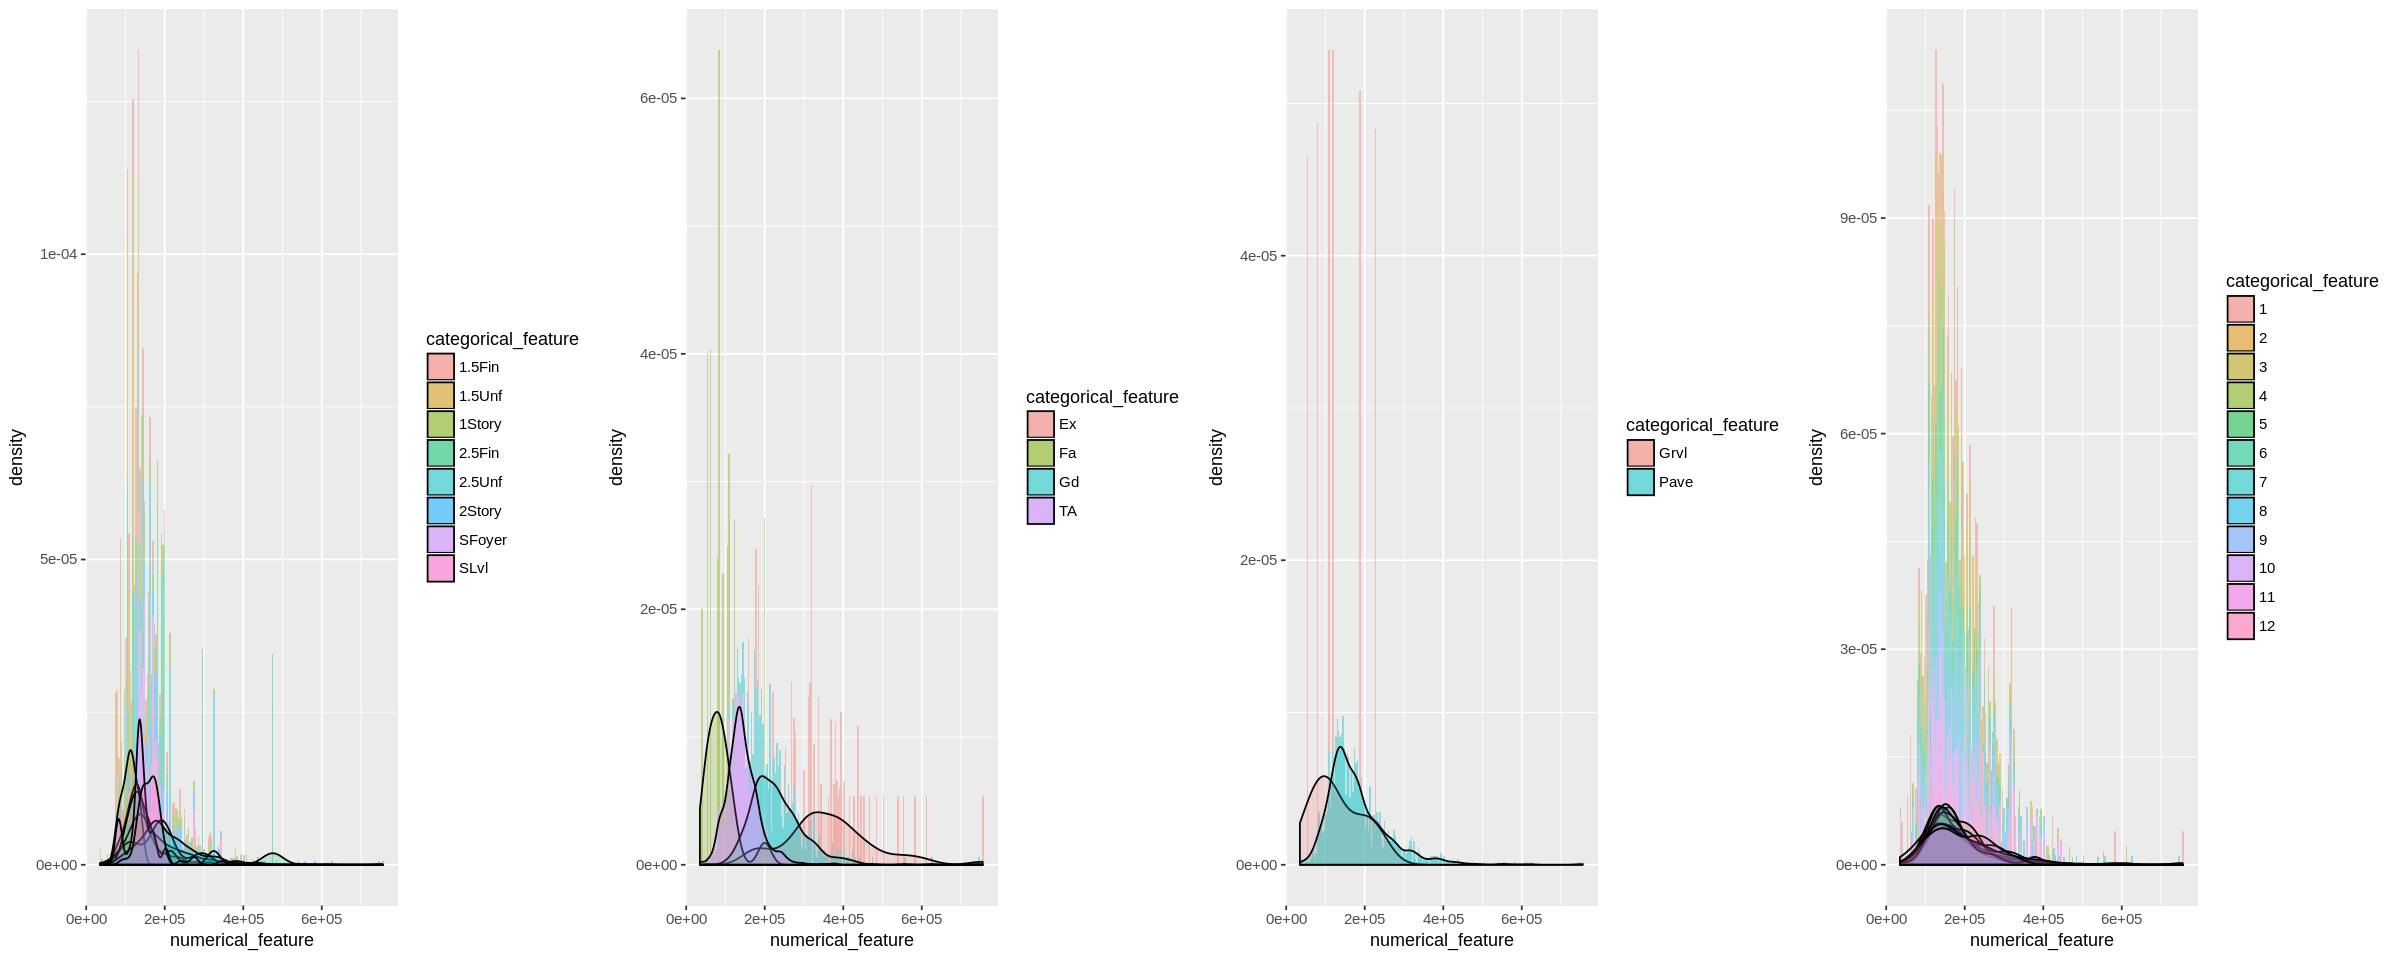

In [65]:
multiplot(hist_with_kde_numerical_by_category(SalePrice,HouseStyle),
          hist_with_kde_numerical_by_category(SalePrice,ExterQual), 
          hist_with_kde_numerical_by_category(SalePrice,Street),
          hist_with_kde_numerical_by_category(SalePrice,MoSold),
          cols = 4)

The following objects are masked from housing_df (pos = 3):

    Alley, BedroomAbvGr, BldgType, BsmtCond, BsmtExposure, BsmtFinSF1,
    BsmtFinSF2, BsmtFinType1, BsmtFinType2, BsmtFullBath, BsmtHalfBath,
    BsmtQual, BsmtUnfSF, CentralAir, Condition1, Condition2,
    Electrical, EnclosedPorch, ExterCond, Exterior1st, Exterior2nd,
    ExterQual, Fence, FireplaceQu, Fireplaces, FirstFlrSF, Foundation,
    FullBath, Functional, GarageArea, GarageCars, GarageCond,
    GarageFinish, GarageQual, GarageType, GarageYrBlt, GrLivArea,
    HalfBath, Heating, HeatingQC, HouseStyle, KitchenAbvGr,
    KitchenQual, LandContour, LandSlope, LotArea, LotConfig,
    LotFrontage, LotShape, LowQualFinSF, MasVnrArea, MasVnrType,
    MiscFeature, MiscVal, MoSold, MSSubClass, MSZoning, Neighborhood,
    OpenPorchSF, OverallCond, OverallQual, PavedDrive, PoolArea,
    PoolQC, RoofMatl, RoofStyle, SaleCondition, SalePrice, SaleType,
    ScreenPorch, SecondFlrSF, Street, ThreeSsnPorch, TotalBsmtSF,
    TotRmsAb

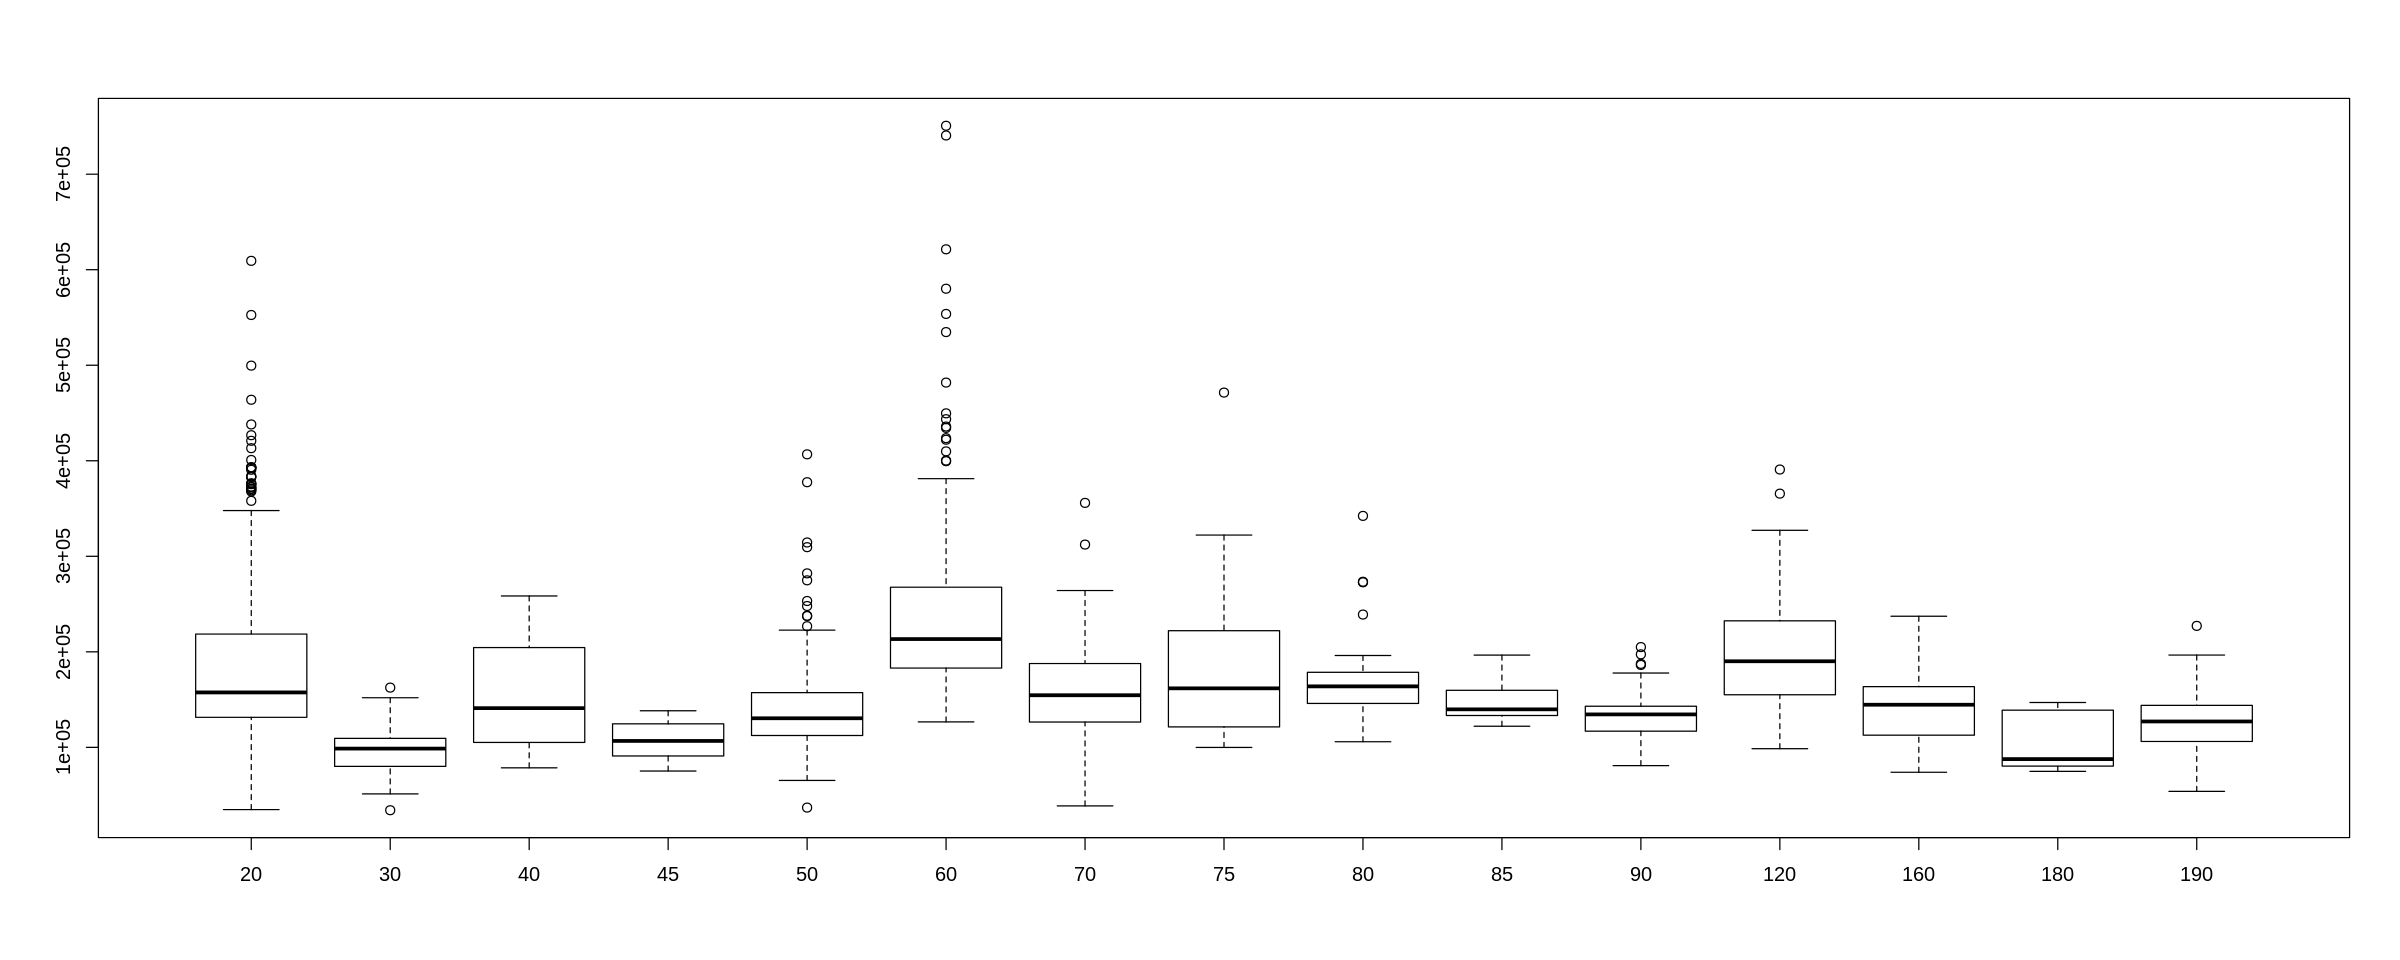

In [66]:
attach(housing_df)
boxplot(SalePrice - GrLivArea ~ MSSubClass)

In [24]:
head(Filter(is.numeric, housing_df))

LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,FirstFlrSF,⋯,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ThreeSsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
65,8450,2003,2003,196,706,0,150,856,856,⋯,548,0,61,0,0,0,0,0,2008,208500
80,9600,1976,1976,0,978,0,284,1262,1262,⋯,460,298,0,0,0,0,0,0,2007,181500
68,11250,2001,2002,162,486,0,434,920,920,⋯,608,0,42,0,0,0,0,0,2008,223500
60,9550,1915,1970,0,216,0,540,756,961,⋯,642,0,35,272,0,0,0,0,2006,140000
84,14260,2000,2000,350,655,0,490,1145,1145,⋯,836,192,84,0,0,0,0,0,2008,250000
85,14115,1993,1995,0,732,0,64,796,796,⋯,480,40,30,0,320,0,0,700,2009,143000
